In [3]:
import sys
sys.path.insert(0, "../../src/yolo/")

import matplotlib.pyplot as plt

from torch.optim import SGD

In [4]:
from model import Yolov1
from lr_scheduler import WarmUpMultiStepLR

## Loss Visualization

In [9]:
def values(dataset, step=None):
    backbones = ['yolo', 'resnet18', 'resnet50', 'vgg11', 'vgg16']
    tlosses, vlosses, tmaps, vmaps = {}, {}, {}, {}
    for backbone in backbones:
        model = Yolov1(backbone, model_save_dir=f"../../src/yolo/models/{dataset}_{backbone}")
        opt = SGD(model.parameters(), lr=1)
        sched = WarmUpMultiStepLR(opt, [0])
        step, tloss, vloss, tmap, vmap = model.load_model(opt, sched, step)
        print(f"found {backbone} checkpoint after training {step} steps")
        tlosses[backbone] = tloss
        vlosses[backbone] = vloss
        tmaps[backbone] = tmap
        vmaps[backbone] = vmap
    return tlosses, vlosses, tmaps, vmaps

In [34]:
def plot_loss(losses, title, save_path):
    fig, ax = plt.subplots(figsize=(7, 5))
    for name, loss in losses.items():
        ax.plot(range(len(loss)), loss, label=name)
    ax.legend()
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Yolo V1 Loss")
    ax.set_title(title)
    fig.savefig(save_path)
    
def plot_map(maps, title, save_path):
    fig, ax = plt.subplots(figsize=(7, 5))
    for name, map in maps.items():
        ax.plot(range(len(map)), map, label=name)
    ax.legend()
    ax.set_xlabel("Epochs")
    ax.set_ylabel("mAP")
    ax.set_title(title)
    fig.savefig(save_path)

In [46]:
#tlosses, vlosses, tmaps, vmaps = values('voc2007', 10990)
tlosses, vlosses, tmaps, vmaps = values('voc2008')
#tlosses, vlosses, tmaps, vmaps = values('voc2012')

*** loading model weight successfully!
*** loading optimizer&lr_scheduler&step successfully!
found yolo checkpoint after training 2499 steps
*** loading model weight fail!
*** loading optimizer&lr_scheduler&step successfully!
found resnet18 checkpoint after training 1499 steps
*** loading model weight fail!
*** loading optimizer&lr_scheduler&step successfully!
found resnet50 checkpoint after training 7499 steps
*** loading model weight fail!
*** loading optimizer&lr_scheduler&step successfully!
found vgg11 checkpoint after training 8999 steps
*** loading model weight fail!
*** loading optimizer&lr_scheduler&step successfully!
found vgg16 checkpoint after training 8999 steps


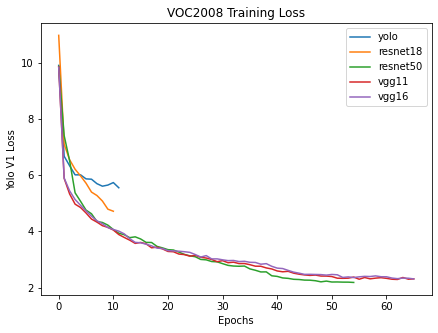

In [47]:
plot_loss(tlosses, "VOC2008 Training Loss", "../../src/yolo/imgs/voc2008_train_loss.jpg")

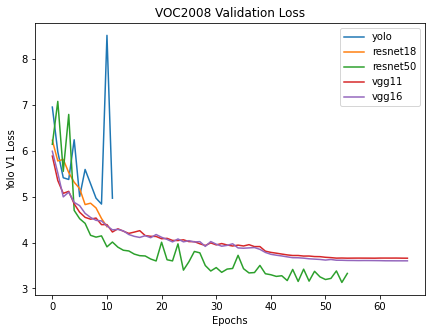

In [48]:
plot_loss(vlosses, "VOC2008 Validation Loss", "../../src/yolo/imgs/voc2008_valid_loss.jpg")

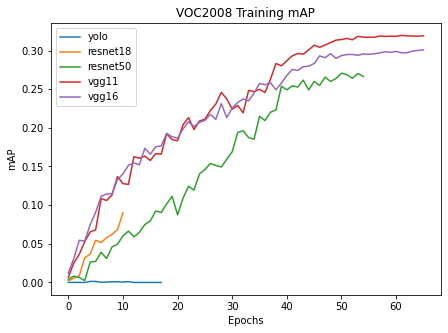

In [49]:
plot_map(tmaps, "VOC2008 Training mAP", "../../src/yolo/imgs/voc2008_train_map.jpg")

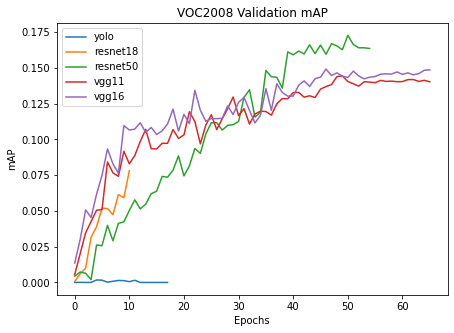

In [50]:
plot_map(vmaps, "VOC2008 Validation mAP", "../../src/yolo/imgs/voc2008_valid_map.jpg")